# Independent Project: Comparing Datasets -  Analyzing Graduation Data of New York City Public Schools

In New York state, students are required to pass an exam known as the Regents exam in order to earn their high school diploma. Historically, students were able to earn an equivalent diploma without passing the Regents exam, called the Local diploma. Beginning in 2019, [students entering the 9th grade no longer have the option to earn a local diploma](https://en.wikipedia.org/wiki/Regents_Examinations#Exam_requirements), and are required to pass the Regents exam to earn their diploma (an exception is made for students with disabilities). I hypothesize that due to existing inequalities, this will disproportionately affect Black and Latino students, leading to fewer students in these demographics earning their high school diploma. Not having a high school diploma is linked to negative life paths: high school dropouts have much [lower earnings, higher incarceration rates](https://education.seattlepi.com/effects-high-school-students-not-finishing-high-school-3118.html), and even [worse health outcomes](https://theconversation.com/the-data-is-in-americans-who-dont-finish-high-school-are-less-healthy-than-the-rest-of-the-us-103663) than people who finish high school. If my hypothesis is correct, the elimination of the Local diploma runs the risk of increasing long-term racial inequalities in New York City. 

To verify my hypothesis, I used [this dataset](https://data.cityofnewyork.us/Education/2005-2010-Graduation-Outcomes-School-Level/vh2h-md7a) from NYC Open Data to examine the trend in Local diploma graduates in New York City. However, this dataset only has data from 2005-2010 graduations; based on the trend I saw on this data, I decided to look at a [dataset with graduation info through 2018.](https://data.cityofnewyork.us/Education/2016-2017-Graduation-Outcomes-School/nb39-jx2v) Using the newer dataset, I calculated trendlines for the Local diploma graduation rates of different racial groups. The trends in this data showed that a higher share of Black and Latino students earn Local Diplomas, and that the percentage of students earning Local Diplomas has been steadily increasing in recent years. 


## Part 1: 2005-2010 Graduation Data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
grad_data = pd.read_csv('/Users/Austen/Desktop/python/2005-2010_Graduation_Outcomes_-_School_Level.csv')
grad_data.head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,NaN,s,NaN,NaN,...,s,NaN,NaN,s,NaN,NaN,s,NaN,s,NaN
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3,17,30.9,45.9,...,17,30.9,45.9,20,36.4,54.1,15,27.3,3,5.5
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2,27,42.2,62.8,...,27,42.2,62.8,16,25.0,37.2,9,14.1,9,14.1
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4,37,47.4,84.1,...,37,47.4,84.1,7,9.0,15.9,15,19.2,11,14.1


In [2]:
grad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25096 entries, 0 to 25095
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Demographic                         25096 non-null  object 
 1   DBN                                 25096 non-null  object 
 2   School Name                         25096 non-null  object 
 3   Cohort                              25096 non-null  object 
 4   Total Cohort                        25096 non-null  int64  
 5   Total Grads - n                     25096 non-null  object 
 6   Total Grads - % of cohort           16704 non-null  float64
 7   Total Regents - n                   25096 non-null  object 
 8   Total Regents - % of cohort         16704 non-null  float64
 9   Total Regents - % of grads          16652 non-null  float64
 10  Advanced Regents - n                25096 non-null  object 
 11  Advanced Regents - % of cohort      16704

### 1.1: Data Cleaning
There is a problem with this dataset - many of the numeric columns registered with an object data type. One of the most important ones is 'Cohort', which we can see from the head of the dataset contained non-numeric entries such as '2006 Aug'. Since the later date corresponds to the latest graduation data, I converted the date to only contain the year, and then keep the rows from August (where applicable).

*Note: the 'Cohort' year is the year that students entered the 9th grade. The '2006 Aug' entry represents an August graduation date for students who entered high school in 2006.*

If the cohort size was less than 20, then all data was surpressed, so I removed rows with fewer than 20 students. I am also focusing on racial demographics, so I also removed rows that measured statistics for non-racial demographics.

In [3]:
dates = grad_data['Cohort'].unique()
print(dates)

['2003' '2004' '2005' '2006' '2006 Aug' '2001' '2002']


In [4]:
# Only the 2006 has a separate August entry, so I only need to clean that data point.
aug = grad_data[grad_data['Cohort'] == '2006 Aug']
print(len(aug))

4131


In [5]:
grad_data['Cohort'] = grad_data['Cohort'].str.replace('2006 Aug', '2006')
grad_data['Cohort'] =grad_data['Cohort'].astype(int)
grad_data = grad_data.drop_duplicates(subset = ['Demographic','DBN','School Name','Cohort','Total Cohort'],keep = 'last')
grad_data.head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,NaN,s,NaN,NaN,...,s,NaN,NaN,s,NaN,NaN,s,NaN,s,NaN
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3,17,30.9,45.9,...,17,30.9,45.9,20,36.4,54.1,15,27.3,3,5.5
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2,27,42.2,62.8,...,27,42.2,62.8,16,25.0,37.2,9,14.1,9,14.1
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,44,56.4,37,47.4,84.1,...,37,47.4,84.1,7,9.0,15.9,15,19.2,11,14.1
5,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2001,64,46,71.9,32,50.0,69.6,...,25,39.1,54.3,14,21.9,30.4,10,15.6,6,9.4


In [6]:
grad_data_avail = grad_data[grad_data['Total Cohort'] >=20]
#grad_data_avail = grad_data_avail[grad_data_avail ]
grad_data_avail['Demographic'].value_counts()

General Education Students     1820
Total Cohort                   1812
English Proficient Students    1781
Female                         1746
Male                           1705
Black                          1472
Hispanic                       1439
Special Education Students      827
English Language Learners       507
Asian                           450
White                           446
Name: Demographic, dtype: int64

In [7]:
grad_data_avail = grad_data_avail[grad_data_avail['Demographic'].isin(['Total Cohort','Black','White','Asian','Hispanic'])]

### 1.2: Checking Data Quality 


To measure data quality and possible bias in the data, I examined how demographic distribution is affected by the elimination of rows with fewer than 20 students. I pivoted the original data and the new dataset to calculate what percentage of rows each group were eliminated due to data suppression. 

In [8]:
pivot_all = pd.DataFrame(grad_data.pivot_table(values = 'DBN',index ='Demographic', aggfunc = 'count',))
pivot_all=pivot_all.rename(columns = {'DBN':'Count Total'})
print(pivot_all)
# since I have not scrubbed the original dataframe of unneccessary demographic groups, they appear in this pivot table.
# They do not transfer to the final table, however.

                             Count Total
Demographic                             
Asian                               1484
Black                               2009
English Language Learners           1696
English Proficient Students         2070
Female                              2001
General Education Students          2065
Hispanic                            1990
Male                                2017
Special Education Students          2059
Total Cohort                        2088
White                               1485


In [9]:
pivot_avail = pd.DataFrame(grad_data_avail.pivot_table(values = 'DBN',index ='Demographic', aggfunc = 'count',))
pivot_avail = pivot_avail.rename(columns = {'DBN':'Count Available'})
print(pivot_avail)

              Count Available
Demographic                  
Asian                     450
Black                    1472
Hispanic                 1439
Total Cohort             1812
White                     446


In [10]:
pivot_merge = pd.merge(pivot_all,pivot_avail, on = 'Demographic')
pivot_merge['Available %'] = round(100*pivot_merge['Count Available']/pivot_merge['Count Total'],2)
print(pivot_merge)

              Count Total  Count Available  Available %
Demographic                                            
Asian                1484              450        30.32
Black                2009             1472        73.27
Hispanic             1990             1439        72.31
Total Cohort         2088             1812        86.78
White                1485              446        30.03


#### 1.2.1
Some demographics have a much smaller pool of data avaiable than others, in particular, the White and  Asian demographics have a low percentage of available information. This is important to be mindful of when conducting analysis, but may not affect the outcome. This may speak to a relatively low number of these demographics enrolled in NYC public schools. To see if this is the case, I summed the number of students in each demographic group and divided this number by the total student count. 

In [11]:
student_count = pd.DataFrame(grad_data.pivot_table(values = 'Total Cohort',index ='Demographic', aggfunc = 'sum'))
total_num_students = grad_data[grad_data['Demographic'] == 'Total Cohort']['Total Cohort'].sum()
student_count['percentage']=round(100*student_count['Total Cohort']/total_num_students,2)
student_count = student_count.sort_values(by='percentage')
print(student_count)
#I am using the entire dataframe for this calculation because I am 
# looking at demographic groups as percentages of the entire student body, including suppressed rows. 

                             Total Cohort  percentage
Demographic                                          
English Language Learners           47636       11.50
White                               60155       14.52
Asian                               61952       14.96
Special Education Students          99491       24.02
Black                              139758       33.74
Hispanic                           149833       36.17
Male                               205554       49.62
Female                             208690       50.38
English Proficient Students        366608       88.50
General Education Students         370595       89.46
Total Cohort                       414244      100.00


### 1.3: Data Exploration
As suspected, the total number of students in the White and Asian demographics make up a smaller percentage of total student population. Having confirmed this, I then looked at at the number of Total graduates, Local diploma graduates, and Regents diploma graduates by demographic.

In [12]:
grad_rate_pivot = pd.DataFrame(grad_data_avail.pivot_table(values = 'Total Grads - % of cohort', index = 'Demographic'))
regents_pivot = pd.DataFrame(grad_data_avail.pivot_table(values = 'Total Regents - % of cohort', index = 'Demographic'))
local_dip_pivot = pd.DataFrame(grad_data_avail.pivot_table(values = 'Local - % of cohort', index = 'Demographic'))
stats_pivot_merged_1 = pd.merge(grad_rate_pivot, regents_pivot, on = 'Demographic')
stats_pivot_merged = pd.merge(stats_pivot_merged_1, local_dip_pivot, on = 'Demographic')
stats_pivot_merged = pd.DataFrame(stats_pivot_merged)
stats_pivot_merged['Total Grads - % of cohort'] = round(stats_pivot_merged['Total Grads - % of cohort'],2) 
stats_pivot_merged['Total Regents - % of cohort'] = round(stats_pivot_merged['Total Regents - % of cohort'],2) 
stats_pivot_merged['Local - % of cohort'] = round(stats_pivot_merged['Local - % of cohort'],2)
print(stats_pivot_merged)

              Total Grads - % of cohort  Total Regents - % of cohort  \
Demographic                                                            
Asian                             76.03                        65.90   
Black                             58.20                        37.60   
Hispanic                          56.41                        36.82   
Total Cohort                      60.97                        41.48   
White                             73.05                        60.94   

              Local - % of cohort  
Demographic                        
Asian                       10.15  
Black                       20.61  
Hispanic                    19.60  
Total Cohort                19.51  
White                       12.12  


#### 1.3.1
19.5% of students graduated with a Local diploma. We can see looking at this data that White and Asian students are more likely to graduate with Regents diplomas (as well as graudate in general), and less likely to graduate with a Local diploma. To further explore this measure, I will look at how the number of students earning the Local diploma has changed over time.

Cohort   Demographic       2001       2002       2003       2004       2005  \
0              Asian  16.122857  11.801370   9.539130   9.406579   7.566216   
1              Black  24.000592  22.328646  22.706818  20.771374  18.739932   
2           Hispanic  22.992529  21.581152  20.821659  20.554475  18.065603   
3       Total Cohort  24.073973  21.723293  21.005396  19.834969  17.402210   
4              White  16.312000  13.685333  12.325714   9.388571  11.038028   

Cohort       2006  
0        6.859211  
1       17.816066  
2       16.030508  
3       16.030688  
4        9.704054  


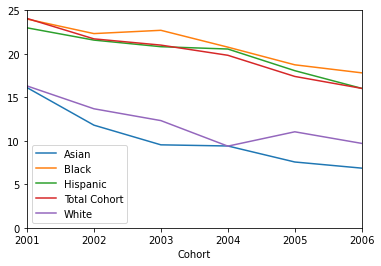

In [13]:
df = grad_data_avail.pivot_table(values ='Local - % of cohort',index = 'Demographic', columns = 'Cohort' )
df = df.reset_index()
# The index must be reset on a numeric scale instead of demographic variable in order to conduct melt function 
# and produce a graph of the data.
melt = pd.melt(df,id_vars='Demographic')
melt.set_index('Cohort', inplace=True)
melt.groupby('Demographic')['value'].plot(legend=True)
plt.xlim(2001,2006)
plt.ylim(0,25)
print(df)

 ## Part 2: 2005-2018 Graduation Data
 
 
The number of Local diplomas decreased across all demographic groups in the 2001-2006 cohorts. Before making any conclusions, I decided to seek out more recent graduation data. I referred back to [NYC open data](https://opendata.cityofnewyork.us/) and found that the [most recent dataset](https://data.cityofnewyork.us/Education/2017-2018-Graduation-Outcomes-School/kybe-9iex) has graduation data through the 2014 Cohort. I used this data to see if the percentage of students who earned the Local diploma continued to trend downward for post-2006 Cohorts.

In [14]:
data_2014 = pd.read_csv('/Users/Austen/Downloads/2017_-_2018_Graduation_Outcomes_School.csv')
data_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508193 entries, 0 to 508192
Data columns (total 25 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   DBN                               508193 non-null  object
 1   School Name                       508193 non-null  object
 2   Demographic Category              508193 non-null  object
 3   Demographic Variable              508193 non-null  object
 4   Cohort Year                       508193 non-null  int64 
 5   Cohort                            508193 non-null  object
 6   Total Cohort #                    508193 non-null  int64 
 7   Total Grads #                     508193 non-null  object
 8   Total Grads % of cohort           508193 non-null  object
 9   Total Regents #                   508193 non-null  object
 10  Total Regents % of cohort         508193 non-null  object
 11  Total Regents % of grads          508193 non-null  object
 12  Ad

In [15]:
data_2014.head(5)

,DBN,School Name,Demographic Category,Demographic Variable,Cohort Year,Cohort,Total Cohort #,Total Grads #,Total Grads % of cohort,Total Regents #,...,Regents w/o Advanced #,Regents w/o Advanced % of cohort,Regents w/o Advanced % of grads,Local #,Local % of cohort,Local % of grads,Still Enrolled #,Still Enrolled % of cohort,Dropped Out #,Dropped Out % of cohort
0,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,2014,4 year August,29,28,96.6,25,...,25,86.2,89.3,3,10.3,10.7,0,0.0,1,3.4
1,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,2013,4 year August,36,25,69.4,23,...,23,63.9,92.0,2,5.6,8.0,3,8.3,7,19.4
2,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,2012,4 year August,44,24,54.5,20,...,19,43.2,79.2,4,9.1,16.7,10,22.7,10,22.7
3,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,2011,4 year August,73,46,63.0,41,...,41,56.2,89.1,5,6.8,10.9,18,24.7,7,9.6
4,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,2010,4 year August,61,26,42.6,26,...,25,41.0,96.2,0,0.0,0.0,18,29.5,17,27.9


In [16]:
print(data_2014['Cohort'].value_counts())

4 year June      122635
5 year June      109788
6 year June      100040
4 year August     98212
5 year August     77518
Name: Cohort, dtype: int64


### 2.1: Data Cleaning & Quality Check

This dataset has slight differences in formatting compared to the previous one. In this dataset, the cohorts have data stored across five possible categories: 4,5, or 6 year graduation, and in June or August. The shortest graduation time is four years with a June graduation, and the latest is six years with a June graduation. To get a feel for the change in the data between the graduation dates, I compared graduation rates of several cohorts of one school. 

In [17]:
Orchard_2010 = data_2014[(data_2014['DBN']=='01M292') & (data_2014['Cohort Year']==2010)&(data_2014['Demographic Variable']=='All Students')]
print(Orchard_2010)

       DBN                 School Name Demographic Category  \
4   01M292  ORCHARD COLLEGIATE ACADEMY         All Students   
14  01M292  ORCHARD COLLEGIATE ACADEMY         All Students   
25  01M292  ORCHARD COLLEGIATE ACADEMY         All Students   
33  01M292  ORCHARD COLLEGIATE ACADEMY         All Students   
43  01M292  ORCHARD COLLEGIATE ACADEMY         All Students   

   Demographic Variable  Cohort Year         Cohort  Total Cohort #  \
4          All Students         2010  4 year August              61   
14         All Students         2010    4 year June              61   
25         All Students         2010  5 year August              55   
33         All Students         2010    5 year June              55   
43         All Students         2010    6 year June              54   

   Total Grads # Total Grads % of cohort Total Regents #  ...  \
4             26                    42.6              26  ...   
14            24                    39.3              24  ...   

#### 2.1.2: Patterns

After looking at graduation data for several different cohorts, I noticed the following patterns: 
1. The 2014 cohort only has 4 year graduation data available; 2013 cohort only has 4&5 year data. This is because this data was finalized in 2018.
2. The latest graduation time for each cohort has the highest number of graduates. Because of this, I will be focusing on this datapoint for each cohort. 
3. In some cases the cohort size changes between graduation times; this is not due to students dropping out, which is its own statistic in this data. It is most likely due to students changing schools. 

In this dataset, data in all rows with fewer than five students was surpressed (compared to the threshold of 20 in the original dataset), so I removed all rows with fewer than five students in the 'Total Cohort #' column.

Another difference in this dataset is that Demographic is split into two columns: Category and Variable. Since we are focusing on disparities in graduation rates between racial groups, I only kept rows with racial demographic data.

In [18]:
data_2014 = data_2014.sort_values(by=['DBN','Demographic Category','Cohort Year'])
data_2014.head()

,DBN,School Name,Demographic Category,Demographic Variable,Cohort Year,Cohort,Total Cohort #,Total Grads #,Total Grads % of cohort,Total Regents #,...,Regents w/o Advanced #,Regents w/o Advanced % of cohort,Regents w/o Advanced % of grads,Local #,Local % of cohort,Local % of grads,Still Enrolled #,Still Enrolled % of cohort,Dropped Out #,Dropped Out % of cohort
21,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,2003,4 year June,5,0,0.0,0,...,0,0.0,No Data,0,0.0,No Data,4,80.0,1,20.0
40,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,2003,5 year June,5,3,60.0,0,...,0,0.0,0.0,3,60.0,100.0,0,0.0,2,40.0
50,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,2003,6 year June,5,3,60.0,0,...,0,0.0,0.0,3,60.0,100.0,0,0.0,2,40.0
20,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,2004,4 year June,55,37,67.3,17,...,17,30.9,45.9,20,36.4,54.1,15,27.3,3,5.5
39,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,2004,5 year June,58,39,67.2,18,...,18,31.0,46.2,21,36.2,53.8,4,6.9,13,22.4


In [19]:
data_2014 = data_2014.drop_duplicates(subset = ['DBN','School Name','Demographic Category','Demographic Variable','Cohort Year'],keep = 'last')
data_2014.head()

,DBN,School Name,Demographic Category,Demographic Variable,Cohort Year,Cohort,Total Cohort #,Total Grads #,Total Grads % of cohort,Total Regents #,...,Regents w/o Advanced #,Regents w/o Advanced % of cohort,Regents w/o Advanced % of grads,Local #,Local % of cohort,Local % of grads,Still Enrolled #,Still Enrolled % of cohort,Dropped Out #,Dropped Out % of cohort
50,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,2003,6 year June,5,3,60.0,0,...,0,0.0,0.0,3,60.0,100.0,0,0.0,2,40.0
49,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,2004,6 year June,56,41,73.2,18,...,18,32.1,43.9,23,41.1,56.1,2,3.6,12,21.4
48,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,2005,6 year June,65,47,72.3,29,...,29,44.6,61.7,18,27.7,38.3,1,1.5,11,16.9
47,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,2006,6 year June,73,44,60.3,36,...,36,49.3,81.8,8,11.0,18.2,1,1.4,21,28.8
46,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,2007,6 year June,77,53,68.8,31,...,31,40.3,58.5,22,28.6,41.5,2,2.6,14,18.2


In [20]:
print(data_2014['Cohort'].value_counts())

6 year June    100040
4 year June     12689
5 year June     11979
Name: Cohort, dtype: int64


In [21]:
data_2014_avail = data_2014[data_2014['Total Cohort #']>=5]

In [22]:
print(data_2014_avail['Demographic Category'].value_counts())

Gender by Ethnicity    26251
Ethnicity              15487
ELL Status             13813
Gender                 10745
Poverty Status         10480
SWD Status             10024
All Students            5485
Name: Demographic Category, dtype: int64


In [23]:
print(data_2014_avail['Demographic Variable'].value_counts())

All Students              5485
Not SWD                   5451
Econ Disadv               5440
Not ELL                   5418
Female                    5384
Male                      5361
Hispanic                  5304
Black                     5220
Not Econ Disadv           5040
Female Hispanic           4884
Female Black              4824
Male Black                4770
Male Hispanic             4754
SWD                       4573
ELL                       2889
Asian                     2408
White                     2164
Male Asian                1804
Never ELL                 1775
Male White                1702
Female Asian              1693
Ever ELL                  1544
Female White              1518
Former ELL                1320
Current ELL                867
Multi-Racial               212
Native American            179
Female Multi-Racial         99
Male Multi-Racial           80
Male Native American        68
Female Native American      55
Name: Demographic Variable, dtype: int6

In [24]:
data_2014_avail = data_2014_avail[data_2014_avail['Demographic Category'].isin(['All Students', 'Ethnicity','Gender by Ethnicity'])]

#### 2.1.4
A possible point of concern is  the difference between categories 'Gender by Ethnicity' and 'Ethnicity'. I was unsure whether they contained overlapping data. It was possible that the Gender by Ethnicity column was introduced as a data point more recently, and is taking the place of the 'Ethnicity' data point for more recent cohorts. I tested this theory by looking at one cohort from one school.

Looking at this data, it was evident that the number of male and female students of a racial group sum to the total number of students from the racial group. Having ensured the overlap, I removed the 'Gender by Ethnicity' Demographic Category from the dataset.

Additionally, this updated dataset contains information on two new racial demographics: Multi-Racial and Native American students. The number of students in these new groups is much smaller than the existing groups, so graduation rate is likely as reliable for them. 

In [25]:
Bushwick = data_2014_avail[(data_2014_avail['DBN']=='32K564')&(data_2014_avail['Cohort Year']==2008)]
print(Bushwick)

           DBN                     School Name Demographic Category  \
507093  32K564  BUSHWICK COMMUNITY HIGH SCHOOL         All Students   
507358  32K564  BUSHWICK COMMUNITY HIGH SCHOOL            Ethnicity   
507415  32K564  BUSHWICK COMMUNITY HIGH SCHOOL            Ethnicity   
507495  32K564  BUSHWICK COMMUNITY HIGH SCHOOL            Ethnicity   
507671  32K564  BUSHWICK COMMUNITY HIGH SCHOOL  Gender by Ethnicity   
507728  32K564  BUSHWICK COMMUNITY HIGH SCHOOL  Gender by Ethnicity   
507794  32K564  BUSHWICK COMMUNITY HIGH SCHOOL  Gender by Ethnicity   
507866  32K564  BUSHWICK COMMUNITY HIGH SCHOOL  Gender by Ethnicity   
507923  32K564  BUSHWICK COMMUNITY HIGH SCHOOL  Gender by Ethnicity   

       Demographic Variable  Cohort Year       Cohort  Total Cohort #  \
507093         All Students         2008  6 year June             203   
507358                Black         2008  6 year June              67   
507415             Hispanic         2008  6 year June             129 

In [26]:
data_2014_avail = data_2014_avail[data_2014_avail['Demographic Category'].isin(['All Students', 'Ethnicity'])]
data_2014_avail['Demographic Variable'].value_counts()

All Students       5485
Hispanic           5304
Black              5220
Asian              2408
White              2164
Multi-Racial        212
Native American     179
Name: Demographic Variable, dtype: int64

In [27]:
pivot_2014 = data_2014_avail.pivot_table(values = 'Total Cohort #',index ='Demographic Variable', aggfunc = 'sum')
print(pivot_2014)

                      Total Cohort #
Demographic Variable                
All Students                 1001461
Asian                         157940
Black                         313478
Hispanic                      377309
Multi-Racial                    2358
Native American                 1626
White                         133888


#### 2.1.5
My first attempt to convert the data type of the 'Local % of Cohort' problem gave me an error that suggested this column contained non-numeric data. Looking at the value counts, I saw some rows still had suppressed data ('s'). Getting rid of rows with 's' in one category should get rid of rows with any 's' values, so I should be able to convert any column to numeric types in further analysis after removing rows with an 's' in this column.

In [28]:
data_2014_avail['Local % of cohort'].value_counts()

0.0     3699
s       2039
20.0     210
14.3     204
16.7     187
        ... 
54.1       1
63.5       1
74.2       1
75.4       1
74.4       1
Name: Local % of cohort, Length: 707, dtype: int64

In [29]:
data_2014_avail = data_2014_avail[data_2014_avail['Local % of cohort'] != 's']

## 2.2: Data Visualization

To explore trends in the data, I created line graphs for the graduation rate of each demographic in the following categories: 
- Local Diploma Graduates
- Regents Diploma Graduates
- Drop Out Rate
- Overall Graduation Rate

Black and Latino students still earned more Local diplomas than other racial groups, but there was a large overall decrease in Local diplomas for all groups between 2005 and 2018. This suggests that more and more students graduated with the Regents diploma instead. To see if this was the case, I plotted the number of students who have earned a Regents diploma as a comparison. I also visualised the drop-out rate. 

*Note: the 2014 data shows a lower graduation rate than the year before because we only have data on the 4-year graduation rate for this cohort, as opposed to other cohorts, which have information for 5&6 year graduation rates.* 

(0.0, 40.0)

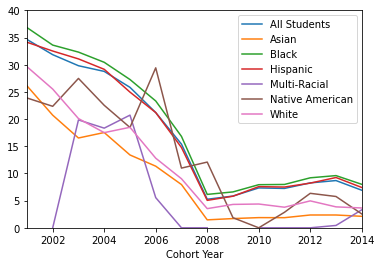

In [30]:
#local diploma grads
data_2014_avail['Local % of cohort'] =data_2014_avail['Local % of cohort'].astype(float)
pivot_2014 = data_2014_avail.pivot_table(values ='Local % of cohort',index = 'Demographic Variable', columns = 'Cohort Year' )
pivot_graph = pivot_2014.reset_index()
melt_2014 = pd.melt(pivot_graph,id_vars='Demographic Variable')
melt_2014.set_index('Cohort Year', inplace=True)
melt_2014.groupby('Demographic Variable')['value'].plot(legend=True)
plt.xlim(2001,2014)
plt.ylim(0,40)

(0.0, 100.0)

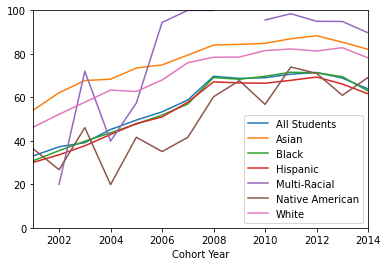

In [31]:
#Regents Diploma
data_2014_avail['Total Regents % of cohort'] =data_2014_avail['Total Regents % of cohort'].astype(float)
pivot_2014_reg = data_2014_avail.pivot_table(values ='Total Regents % of cohort',index = 'Demographic Variable', columns = 'Cohort Year' )
pivot_graph_reg = pivot_2014_reg.reset_index()
melt_2014_reg = pd.melt(pivot_graph_reg,id_vars='Demographic Variable')
melt_2014_reg.set_index('Cohort Year', inplace=True)
melt_2014_reg.groupby('Demographic Variable')['value'].plot(legend=True)
plt.xlim(2001,2014)
plt.ylim(0,100)

(0.0, 100.0)

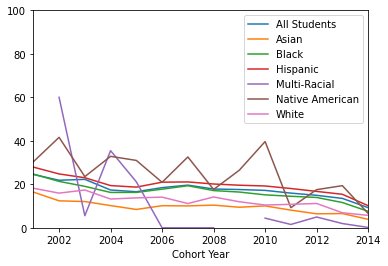

In [32]:
#Drop out rate
data_2014_avail['Dropped Out % of cohort'] =data_2014_avail['Dropped Out % of cohort'].astype(float)
pivot_2014_drop = pd.DataFrame(data_2014_avail.pivot_table(values ='Dropped Out % of cohort',index = 'Demographic Variable', columns = 'Cohort Year' ))
pivot_graph_drop = pivot_2014_drop.reset_index()
melt_2014_drop = pd.melt(pivot_graph_drop,id_vars='Demographic Variable')
melt_2014_drop.set_index('Cohort Year', inplace=True)
melt_2014_drop.groupby('Demographic Variable')['value'].plot(legend=True)
plt.xlim(2001,2014)
plt.ylim(0,100)

(0.0, 100.0)

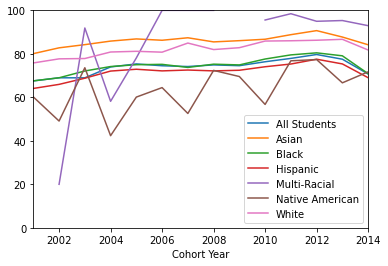

In [33]:
# Overall Graduation Rate 
data_2014_avail['Total Grads % of cohort'] =data_2014_avail['Total Grads % of cohort'].astype(float)
pivot_2014_total = pd.DataFrame(data_2014_avail.pivot_table(values ='Total Grads % of cohort',index = 'Demographic Variable', columns = 'Cohort Year' ))
pivot_graph_total = pivot_2014_total.reset_index()
melt_2014_total = pd.melt(pivot_graph_total,id_vars='Demographic Variable')
melt_2014_total.set_index('Cohort Year', inplace=True)
melt_2014_total.groupby('Demographic Variable')['value'].plot(legend=True)
plt.xlim(2001,2014)
plt.ylim(0,100)

### 2.3: Analysis of Graduation Outcomes

The graphical results show a clear trend for all three graudation outcomes: the number of dropouts and local diplomas have decreased, while the number of regents diplomas have increased. However, the total number of graduates has stayed fairly constant across all groups, with only a slight increase from the 2001 to 2013 cohorts. This would suggest that the decrease in Local diploma graduates is, in fact, being complemented by the increase in Regents grads. To confirm, I will create a table with the percentage change in graduation outcomes between 2001 and 2013, using the pivot tables I created in the previous section to visualize the data. 

As an overall trend, the number of dropouts and local diplomas decreased (25.8% and 11.3% respectively) across all racial groups. This corresponds to an increase in Regents diplomas and the overall graduation rate (35.8% and 10.2%) across all groups. 

However, a closer inspection of the graphs suggested that the number of Local diploma graduates hit a low with the 2008 cohort (2012-2014 graduation) and then increased slightly in later cohorts. The number of students earning a Regents diploma also stabilized. If I change the delta function to look at the change in statistics between 2008 and 2013, the numbers tell a less aspirational story.

*Note: I only used data for cohorts between 2001 and 2013 because the 2014 cohort has only 4-year graduation data available, giving the appearance of a smaller number of graduates for this cohort.*

In [34]:
def delta(df):
    df['delta'] = round(df[2013]-df[2001],2)
    return df

def delta_df(df):
    df = delta(df)
    df = df.reset_index()
    new_df = df[['Demographic Variable','delta']].copy()
    return new_df 

delta_local = delta_df(pivot_2014)
delta_local = delta_local.rename(columns = {'delta':'delta_local'})
delta_dropouts = delta_df(pivot_2014_drop)
delta_dropouts = delta_dropouts.rename(columns = {'delta':'delta_dropouts'})
delta_regents = delta_df(pivot_2014_reg)
delta_regents = delta_regents.rename(columns = {'delta':'delta_regents'})
delta_total_grads = delta_df(pivot_2014_total)
delta_total_grads=delta_total_grads.rename(columns = {'delta':'delta_total_grads'})
delta_1 = pd.merge(delta_local,delta_dropouts, on = 'Demographic Variable')
delta_2 = pd.merge(delta_1, delta_regents, on = 'Demographic Variable')
delta_all = pd.merge(delta_2, delta_total_grads, on = 'Demographic Variable')
print(delta_all)

Cohort Year Demographic Variable  delta_local  delta_dropouts  delta_regents  \
0                   All Students       -25.96          -11.02          35.79   
1                          Asian       -23.76           -9.89          31.27   
2                          Black       -27.23          -13.08          38.63   
3                       Hispanic       -24.89          -12.50          36.00   
4                   Multi-Racial          NaN             NaN            NaN   
5                Native American       -18.12          -10.99          24.62   
6                          White       -25.79          -11.29          36.55   

Cohort Year  delta_total_grads  
0                         9.97  
1                         7.64  
2                        11.52  
3                        11.28  
4                          NaN  
5                         6.49  
6                        10.87  


In [35]:
# 2008-2013 Outcomes
def delta(df):
    df['delta'] = round(df[2013]-df[2008],2)
    return df

def delta_df(df):
    df = delta(df)
    df = df.reset_index()
    new_df = df[['Demographic Variable','delta']].copy()
    return new_df 

delta_local = delta_df(pivot_2014)
delta_local = delta_local.rename(columns = {'delta':'delta_local'})
delta_dropouts = delta_df(pivot_2014_drop)
delta_dropouts = delta_dropouts.rename(columns = {'delta':'delta_dropouts'})
delta_regents = delta_df(pivot_2014_reg)
delta_regents = delta_regents.rename(columns = {'delta':'delta_regents'})
delta_total_grads = delta_df(pivot_2014_total)
delta_total_grads=delta_total_grads.rename(columns = {'delta':'delta_total_grads'})
delta_1 = pd.merge(delta_local,delta_dropouts, on = 'Demographic Variable')
delta_2 = pd.merge(delta_1, delta_regents, on = 'Demographic Variable')
delta_all = pd.merge(delta_2, delta_total_grads, on = 'Demographic Variable')
print(delta_all)

Cohort Year Demographic Variable  delta_local  delta_dropouts  delta_regents  \
0                   All Students         3.44           -4.32          -0.82   
1                          Asian         0.89           -3.88           1.34   
2                          Black         3.46           -5.48           0.39   
3                       Hispanic         4.20           -4.73          -1.00   
4                   Multi-Racial         0.43            1.96          -5.11   
5                Native American        -6.33            1.74           0.62   
6                          White         0.32           -7.25           4.40   

Cohort Year  delta_total_grads  
0                         2.62  
1                         2.24  
2                         3.85  
3                         3.20  
4                        -4.68  
5                        -5.72  
6                         4.71  


### 2.3.2
Since I am mainly concerned with the number of Local diploma graduates, I examined the trend of Local diploma graduates of each racial demographic since 2008. 

In [36]:
pivot_2014.head

<bound method NDFrame.head of Cohort Year                2001       2002       2003       2004       2005  \
Demographic Variable                                                          
All Students          34.648918  31.848276  29.814791  28.772647  25.837297   
Asian                 26.117347  20.718447  16.519444  17.525833  13.400000   
Black                 36.835326  33.609865  32.319841  30.446127  27.278662   
Hispanic              34.136816  32.518421  31.069884  29.156314  24.962727   
Multi-Racial                NaN   0.000000  19.846667  18.333333  20.725000   
Native American       23.883333  22.350000  27.480000  22.533333  18.457143   
White                 29.639623  25.518919  20.094059  17.505714  18.489167   

Cohort Year                2006       2007       2008      2009      2010  \
Demographic Variable                                                        
All Students          21.201535  15.389851   5.250355  5.839180  7.334286   
Asian                 11.33

In [37]:
data = pivot_2014[[2008,2009,2010,2011,2012,2013]]
data = data.reset_index()
new_list = []
for i in range(len(data)):
    new_list.append([data.iloc[i,0],data.iloc[i,1:].values])
    print(new_list[i][0])

All Students
Asian
Black
Hispanic
Multi-Racial
Native American
White


asian:  
0.1837 x - 367.3
white:  
0.08513 x - 167
black:  
0.7176 x - 1435
hispanic:  
0.8048 x - 1611


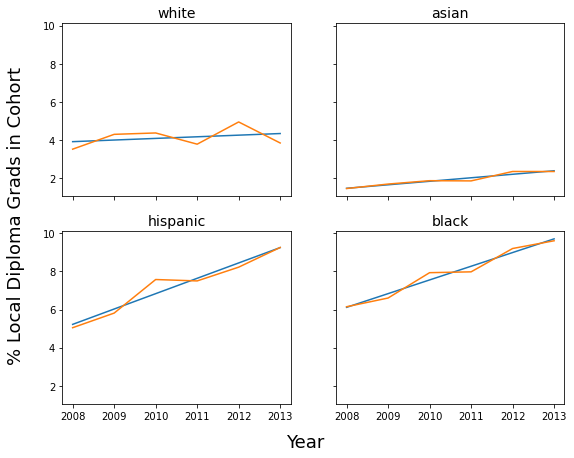

In [38]:
asian = new_list[1][1].astype(float)
black = new_list[2][1].astype(float)
hispanic = new_list[3][1].astype(float)
white = new_list[6][1].astype(float)
X = np.array([2008,2009,2010,2011,2012,2013]).astype(float)
fig, ax = plt.subplots(2, 2, figsize=(9, 7), sharex=True, sharey=True)

z = np.polyfit(X, asian, 1)
p_1 = np.poly1d(z)
ax[0, 1].plot(X,p_1(X))
ax[0, 1].plot(X, asian)
ax[0, 1].set_title('asian', fontsize=14)


z = np.polyfit(X, white, 1)
p_2 = np.poly1d(z)
ax[0, 0].plot(X,p_2(X))
ax[0, 0].plot(X, white)
ax[0, 0].set_title('white', fontsize=14)

z = np.polyfit(X, black, 1)
p_3 = np.poly1d(z)
ax[1, 1].plot(X,p_3(X))
ax[1, 1].plot(X, black)
ax[1, 1].set_title('black', fontsize=14)

z = np.polyfit(X, hispanic, 1)
p_4 = np.poly1d(z)
ax[1, 0].plot(X,p_4(X))
ax[1, 0].plot(X, hispanic)
ax[1, 0].set_title('hispanic', fontsize=14)


fig.text(0.5, 0.04, 'Year', ha='center', fontsize=18)
44
fig.text(0.04, 0.5, '% Local Diploma Grads in Cohort', va='center', rotation='vertical', fontsize=18)
print('asian:',p_1)
print('white:',p_2)
print('black:',p_3)
print('hispanic:',p_4)

### 2.4: Conclusion
Not only do a higher percentage of Black and Hispanic students earn a Local diploma, there has been a larger increase in the number of Local diplomas earned for Black and Latino students compared to White and Asian students since 2008. The slope of the formulas for the trendlines show an increase of 0.72% of Black students and 0.8% of Hispanic students per year earning the Local diploma, compared to an increas for White and Asian students of 0.08% and 0.18%. If this trend continues, an increasingly disproportionate number of Black and Latino students may be locked out of finishing school due to the elimination of the Local diploma.

In [39]:
data_2014_avail['Local #'] =data_2014_avail['Local #'].astype(int)
cohort_2013 = data_2014_avail[data_2014_avail['Cohort Year']==2013]
pivot_impact = cohort_2013.pivot_table(values = 'Local #',index ='Demographic Variable', aggfunc = 'sum')
print(pivot_impact)

                      Local #
Demographic Variable         
All Students             4853
Asian                     201
Black                    1700
Hispanic                 2342
Multi-Racial                2
Native American             8
White                     361


For the 2013 cohort alone, 4,853 students earned a Local diploma. Without an alternative path to graduation or an intensified effort to help all students to earn a Regents diploma, this represents a growing percentage of New York children who will be locked out of completing their education. 

The majority of these students are Black or Hispanic, and these students are earning a Local diploma at increasing rates. Therefore, I believe there is substantial evidence that these groups will be disproportionately affected by the elimination of the Local Diploma. I sincerely hope that there are plans in place to bridge the gap between for would-be Local diploma grads for incoming classes, so that all students in New York have a chance at completing high school. 